In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
%matplotlib inline

np.random.seed(20171001)

In [3]:
mnist = input_data.read_data_sets("./data/", one_hot=True)

Extracting ./data/train-images-idx3-ubyte.gz
Extracting ./data/train-labels-idx1-ubyte.gz
Extracting ./data/t10k-images-idx3-ubyte.gz
Extracting ./data/t10k-labels-idx1-ubyte.gz


In [5]:
x = tf.placeholder(tf.float32, [None, 784])
w = tf.Variable(tf.zeros([784, 10]))
w0 = tf.Variable(tf.zeros([10]))
f = tf.matmul(x, w) + w0
p = tf.nn.softmax(f)
t = tf.placeholder(tf.float32, [None, 10])

In [6]:
loss = -tf.reduce_sum(t * tf.log(p))
train_step = tf.train.AdamOptimizer().minimize(loss)

In [8]:
correct_prediction =  tf.equal(tf.argmax(p, 1), tf.argmax(t, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [9]:
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

i = 0
for _ in range(20000):
    i += 1
    batch_xs, batch_ts = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, t: batch_ts})
    if i % 100 == 0:
        loss_val, acc_val = sess.run([loss, accuracy], feed_dict = {x: batch_xs, t: batch_ts})
        print("step: %d, loss: %f, acc: %f" % (i, loss_val, acc_val))

step: 100, loss: 78.989502, acc: 0.770000
step: 200, loss: 51.413406, acc: 0.880000
step: 300, loss: 51.574944, acc: 0.830000
step: 400, loss: 46.818424, acc: 0.880000
step: 500, loss: 33.371044, acc: 0.940000
step: 600, loss: 44.647465, acc: 0.880000
step: 700, loss: 36.138592, acc: 0.900000
step: 800, loss: 21.681747, acc: 0.940000
step: 900, loss: 37.081818, acc: 0.880000
step: 1000, loss: 25.981949, acc: 0.930000
step: 1100, loss: 30.244078, acc: 0.920000
step: 1200, loss: 35.140335, acc: 0.870000
step: 1300, loss: 42.731411, acc: 0.890000
step: 1400, loss: 37.031998, acc: 0.900000
step: 1500, loss: 41.681755, acc: 0.870000
step: 1600, loss: 29.426338, acc: 0.930000
step: 1700, loss: 19.002747, acc: 0.970000
step: 1800, loss: 20.977560, acc: 0.920000
step: 1900, loss: 40.536224, acc: 0.890000
step: 2000, loss: 39.602882, acc: 0.900000
step: 2100, loss: 34.002594, acc: 0.900000
step: 2200, loss: 28.824173, acc: 0.910000
step: 2300, loss: 32.141464, acc: 0.910000
step: 2400, loss: 30

step: 19000, loss: 29.145191, acc: 0.950000
step: 19100, loss: 21.205929, acc: 0.920000
step: 19200, loss: 21.961870, acc: 0.960000
step: 19300, loss: 23.040409, acc: 0.940000
step: 19400, loss: 21.998350, acc: 0.920000
step: 19500, loss: 17.800083, acc: 0.920000
step: 19600, loss: 27.674376, acc: 0.930000
step: 19700, loss: 26.954430, acc: 0.940000
step: 19800, loss: 20.314461, acc: 0.920000
step: 19900, loss: 17.254749, acc: 0.960000
step: 20000, loss: 15.153737, acc: 0.950000


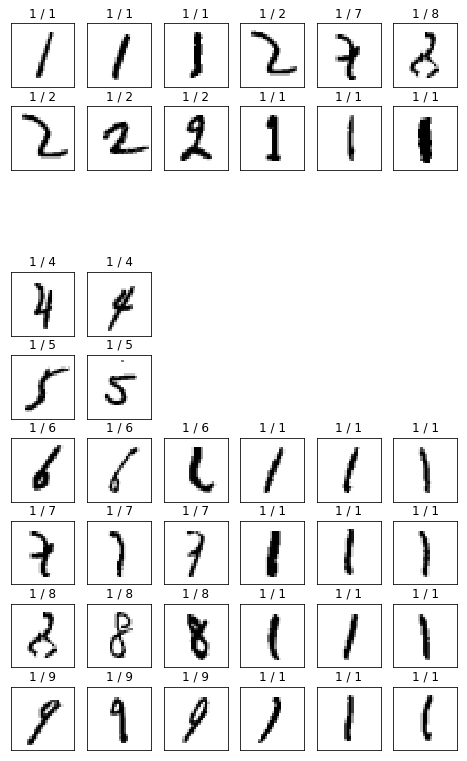

In [15]:
images, labels = mnist.test.images, mnist.test.labels
p_val = sess.run(p, feed_dict={x: images, t: labels})

fig = plt.figure(figsize=(8, 15))
for i in range(10):
    c = 1
    for (image, label, pred) in zip(images, labels, p_val):
        prediction, actual = np.argmax(pred), np.argmax(label)
        if prediction != 1:
            continue
        if (c < 4 and i == actual) or (c >= 4 and i != actual):
            subplot = fig.add_subplot(10, 6, i * 6 + c)
            subplot.set_xticks([])
            subplot.set_yticks([])
            subplot.set_title('%d / %d' % (prediction, actual))
            subplot.imshow(image.reshape((28, 28)), vmin=0, vmax = 1, cmap=plt.cm.gray_r, interpolation="nearest")
            c += 1
            if c > 6:
                break